<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/COVID_19_Projections_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [1]:
print('Welcome to the COVID-19_Projections Statistics')
print('')
print('Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.')
userinput = input('Please put state here:')

Welcome to the COVID-19_Projections Statistics

Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.
Please put state here:CA


**Framework for Cases and Deaths from Covid_Projections**



In [2]:
# Might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# grabbing the Data
url = 'https://github.com/youyanggu/covid19-infection-estimates-latest/raw/main/latest_all_estimates_states.csv'
df = pd.read_csv(url)

In [5]:
# indexing the data
df = df.loc[:,['date','state','total_deaths','total_infected_mean']]


In [6]:
# converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [7]:
# renaming the columns
df['Deaths'] = df['total_deaths']
df['Cases'] = df['total_infected_mean']
df = df.drop(columns=['total_deaths','total_infected_mean'])

In [8]:
# getting user input
df = df[df['state'] == userinput]

In [9]:
# making sure the data starts March 1st 
df = df[df['date'] >= '03-01-2020']


In [10]:
# dropping Null Values
df = df.dropna()

In [11]:
# creating the day column
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [12]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [13]:
# setting the avg day of case to be the first day of the day column
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [14]:
df = df.reset_index(drop = True)

In [15]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)


In [16]:
# making sure it only calculate where the deaths >0
df = df[df['Deaths'] > 0]

In [17]:
# setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [18]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [19]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [20]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [21]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [22]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [23]:
# dropping null values for deaths
df = df.dropna()

In [24]:
# avg death day - avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [25]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [26]:
# avg death day/current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [27]:
# converting to datetime
df.date = pd.to_datetime(df.date)

In [28]:
df = df.drop(columns='index')

In [29]:
df

,date,state,Deaths,Cases,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,2020-03-12,CA,4,58780.4,12.0,7.39,12.00,0.00566176,8.14581e-05,4.61,0.615833,1.000000
1,2020-03-13,CA,4,68157.8,13.0,8.16,12.00,0.006565,8.14581e-05,3.84,0.627692,0.923077
2,2020-03-14,CA,5,77537.3,14.0,8.87,12.40,0.00746844,0.000101823,3.53,0.633571,0.885714
3,2020-03-15,CA,5,86771.5,15.0,9.52,12.40,0.00835788,0.000101823,2.88,0.634667,0.826667
4,2020-03-16,CA,6,95720.2,16.0,10.13,13.00,0.00921982,0.000122187,2.87,0.633125,0.812500
...,...,...,...,...,...,...,...,...,...,...,...,...
342,2021-02-17,CA,47507,10344200.0,354.0,241.40,253.69,0.996359,0.967457,12.29,0.681921,0.716638
343,2021-02-18,CA,47924,10354000.0,355.0,241.51,254.57,0.997303,0.975949,13.06,0.680310,0.717099
344,2021-02-19,CA,48344,10363500.0,356.0,241.61,255.45,0.998218,0.984503,13.84,0.678680,0.717556
345,2021-02-20,CA,48825,10372900.0,357.0,241.71,256.45,0.999123,0.994298,14.74,0.677059,0.718347


**Statistics**

In [30]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()

In [31]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)

COVID-19 STATISTICS

State =  CA
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 241.81
Death =  257.03
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 15.469999999999999
Case Day - Death Day = 37.22999999999999


**Data Visualization**

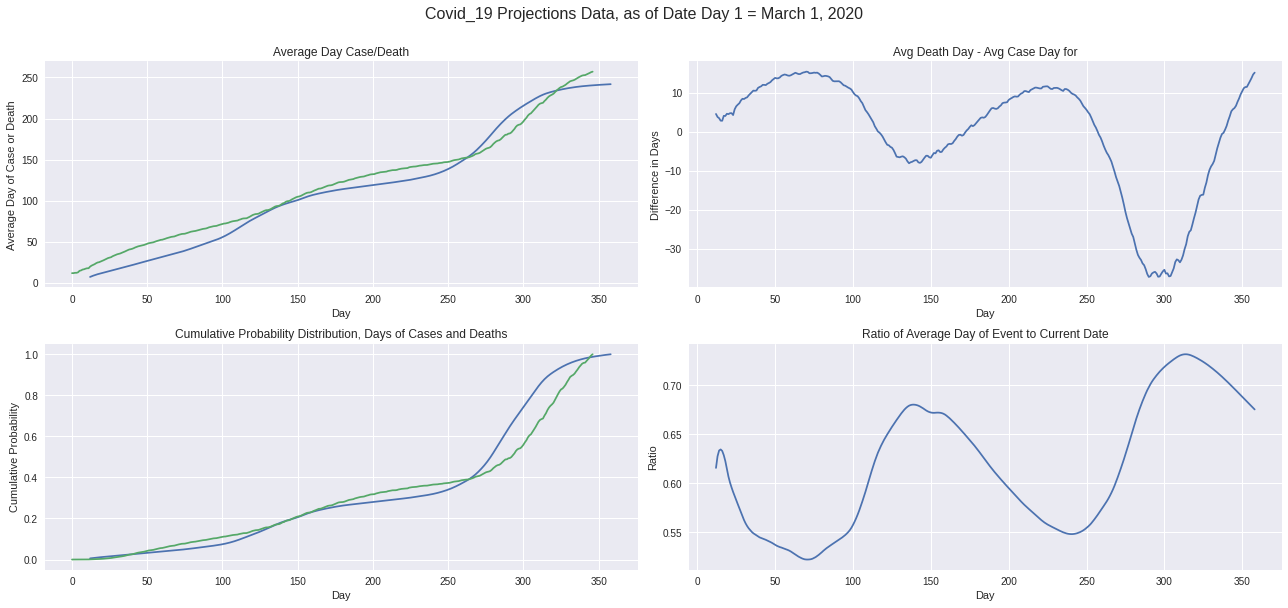

In [33]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day Case/Death')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')

plt.subplot(2,2,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Avg Death Day - Avg Case Day for')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(2,2,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')

plt.subplot(2,2,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date')
plt.xlabel('Day')
plt.ylabel('Ratio')



plt.suptitle('Covid_19 Projections Data, as of Date Day 1 = March 1, 2020', size= 16,y=1.05)
plt.tight_layout()

plt.style.use('seaborn')